In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report, make_scorer, average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
alzheimer = df.drop(columns="DoctorInCharge")
alzheimer

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


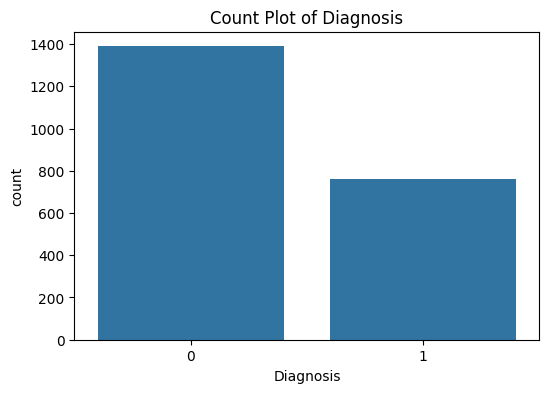

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="Diagnosis", data=alzheimer)
plt.title("Count Plot of Diagnosis")
plt.show()

Coeficients:
	Age --> 0.0019217282769082788
	Gender --> 0.1383038392611655
	Ethnicity --> 0.007703054878469762
	EducationLevel --> -0.013328037401694224
	BMI --> 0.006065557147020274
	Smoking --> -0.2056679475349757
	AlcoholConsumption --> -0.005628354025241631
	PhysicalActivity --> -0.005336758047968777
	DietQuality --> 0.019583681082975098
	SleepQuality --> -0.05700379419231018
	FamilyHistoryAlzheimers --> -0.14314080161425013
	CardiovascularDisease --> 0.18174033275293444
	Diabetes --> 0.15415605743740268
	Depression --> -0.04640010958046241
	HeadInjury --> -0.3474405162340613
	Hypertension --> -0.05493732729486313
	SystolicBP --> 0.002126811151723849
	DiastolicBP --> 0.0047222303641899005
	CholesterolTotal --> 0.002969047275793812
	CholesterolLDL --> -0.0029512966735805645
	CholesterolHDL --> 0.008240957696878243
	CholesterolTriglycerides --> 0.0010488288790043237
	MMSE --> -0.10292459727381073
	FunctionalAssessment --> -0.44188901165595096
	MemoryComplaints --> 2.694869374417711
	

/home/judit/Escritorio/UNI/MatCAD/3r Curs/APC/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


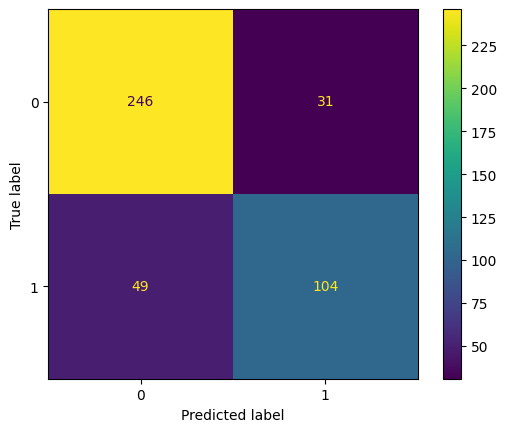

In [6]:
var = [c for c in alzheimer.columns if c not in ["Diagnosis", "PatientID"]]

target_variable = "Diagnosis"

X = alzheimer[var]
y = alzheimer[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Coeficients:")
for i in range(len(var)):
    print(f"\t{var[i]} --> {model.coef_[0][i]}")

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\nMètriques del model:")
print(f"Accuracy:   {acc:.3f}")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")
print(f"F1-score:   {f1:.3f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show() 


Coeficients:
	Age --> -0.0018152988886993011
	Gender --> 0.0065819608843457915
	Ethnicity --> -0.006884575761361472
	EducationLevel --> -0.0072302817918235805
	BMI --> -0.00017940084113619707
	Smoking --> -0.029517079408614
	AlcoholConsumption --> -0.0018791456479650313
	PhysicalActivity --> 0.0004956888041590351
	DietQuality --> 0.0011975526536247534
	SleepQuality --> -0.009500060896243947
	FamilyHistoryAlzheimers --> -0.017481665635114253
	CardiovascularDisease --> 0.010401075603668507
	Diabetes --> -0.0011769062372104248
	Depression --> -0.002938567679107595
	HeadInjury --> -0.024754811263902925
	Hypertension --> 0.008140475002133576
	SystolicBP --> -5.5167076328459336e-05
	DiastolicBP --> 1.545163442532724e-05
	CholesterolTotal --> 0.00010680190229925783
	CholesterolLDL --> -0.0004217369074209826
	CholesterolHDL --> 0.0007912109394117254
	CholesterolTriglycerides --> 9.640613539021356e-05
	MMSE --> -0.013111221582708058
	FunctionalAssessment --> -0.0543958134898183
	MemoryComplaint

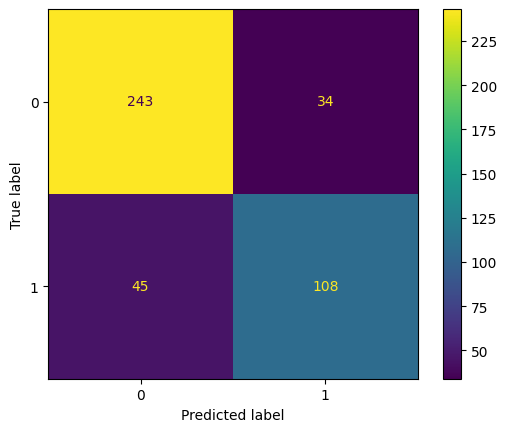

In [7]:
var = [c for c in alzheimer.columns if c not in ["Diagnosis", "PatientID"]]

target_variable = "Diagnosis"

X = alzheimer[var]
y = alzheimer[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = Lasso(alpha=0.001).fit(X_train, y_train)


print("Coeficients:")
for i in range(len(var)):
    print(f"\t{var[i]} --> {model.coef_[i]}")


y_pred = model.predict(X_test)

y_pred = (y_pred >= 0.5).astype(int)


f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\nMètriques del model:")
print(f"Accuracy:   {acc:.3f}")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")
print(f"F1-score:   {f1:.3f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show() 



SVM metrics:
Accuracy:   0.833
Precision:  0.819
Recall:     0.680
F1-score:   0.743


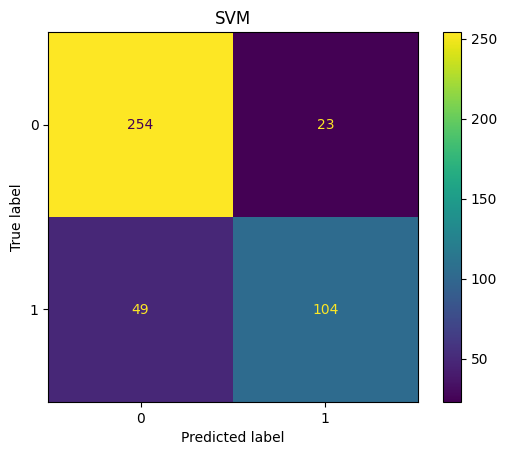


Random Forest metrics:
Accuracy:   0.928
Precision:  0.955
Recall:     0.837
F1-score:   0.892


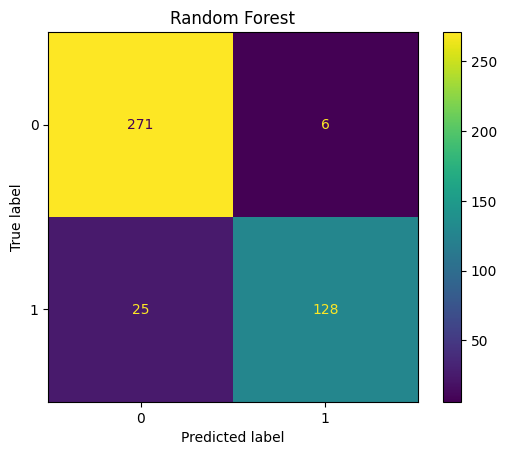


Gradient Boosting metrics:
Accuracy:   0.942
Precision:  0.957
Recall:     0.876
F1-score:   0.915


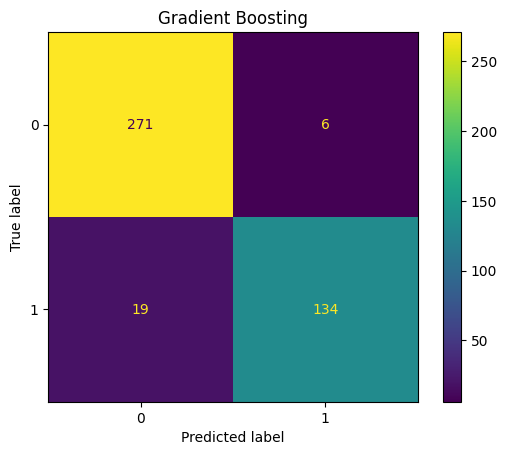


Logistic Regression metrics:
Accuracy:   0.814
Precision:  0.763
Recall:     0.693
F1-score:   0.726


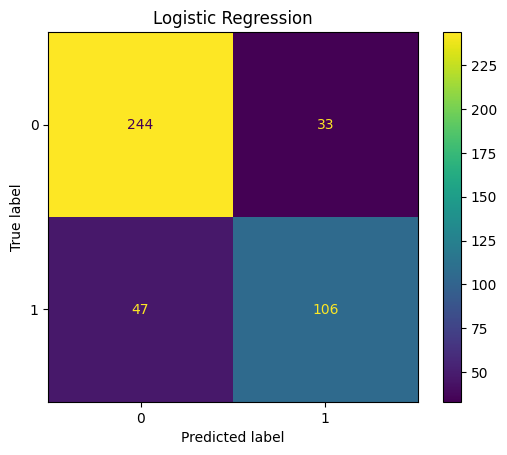


K-Nearest Neighbors metrics:
Accuracy:   0.709
Precision:  0.652
Recall:     0.392
F1-score:   0.490


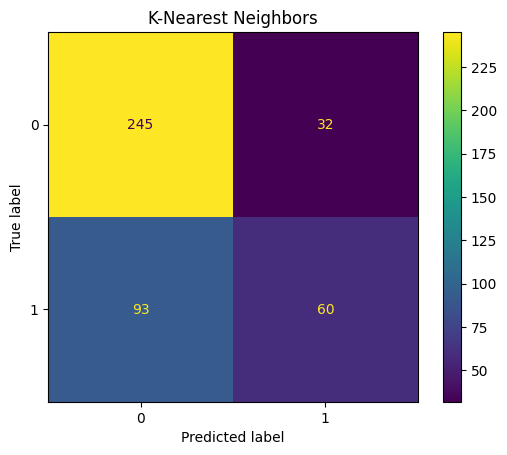

In [8]:
models = {
    "SVM": make_pipeline(StandardScaler(), SVC(probability=True, random_state=1)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=1)),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}
    
    print(f"\n{name} metrics:")
    print(f"Accuracy:   {acc:.3f}")
    print(f"Precision:  {prec:.3f}")
    print(f"Recall:     {rec:.3f}")
    print(f"F1-score:   {f1:.3f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, KFold

models = {
    "SVM": make_pipeline(StandardScaler(), SVC(probability=True, random_state=1)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=1)),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = ["accuracy", "precision", "recall", "f1"]

cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    cv_results[name] = {
        "Accuracy": np.mean(scores["test_accuracy"]),
        "Precision": np.mean(scores["test_precision"]),
        "Recall": np.mean(scores["test_recall"]),
        "F1-score": np.mean(scores["test_f1"])
    }

for model_name, metrics in cv_results.items():
    print(f"\n{model_name} Cross-Validation Metrics:")
    print(f"Accuracy:  {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall:    {metrics['Recall']:.3f}")
    print(f"F1-score:  {metrics['F1-score']:.3f}")


SVM Cross-Validation Metrics:
Accuracy:  0.842
Precision: 0.820
Recall:    0.712
F1-score:  0.761

Random Forest Cross-Validation Metrics:
Accuracy:  0.935
Precision: 0.953
Recall:    0.861
F1-score:  0.904

Gradient Boosting Cross-Validation Metrics:
Accuracy:  0.946
Precision: 0.927
Recall:    0.918
F1-score:  0.923

Logistic Regression Cross-Validation Metrics:
Accuracy:  0.839
Precision: 0.800
Recall:    0.734
F1-score:  0.764

K-Nearest Neighbors Cross-Validation Metrics:
Accuracy:  0.718
Precision: 0.647
Recall:    0.442
F1-score:  0.524


In [10]:
var = [c for c in alzheimer.columns if c not in ["Diagnosis", "PatientID"]]

target_variable = "Diagnosis"

X = alzheimer[var]
y = alzheimer[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, KFold

models = {
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier())
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = ["accuracy", "precision", "recall", "f1"]

cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    cv_results[name] = {
        "F1-score": np.mean(scores["test_f1"])
    }

print("F1 mitjà per model:")
for model_name, metrics in cv_results.items():
    print(f"{model_name}: {metrics['F1-score']:.3f}")

F1 mitjà per model:
SVM: 0.761
Random Forest: 0.909
Gradient Boosting: 0.922
Logistic Regression: 0.764
K-Nearest Neighbors: 0.524


SVM                  F1: 0.757 ± 0.028
Random Forest        F1: 0.906 ± 0.020
Gradient Boosting    F1: 0.922 ± 0.014
Logistic Regression  F1: 0.764 ± 0.026
K-Nearest Neighbors  F1: 0.535 ± 0.030


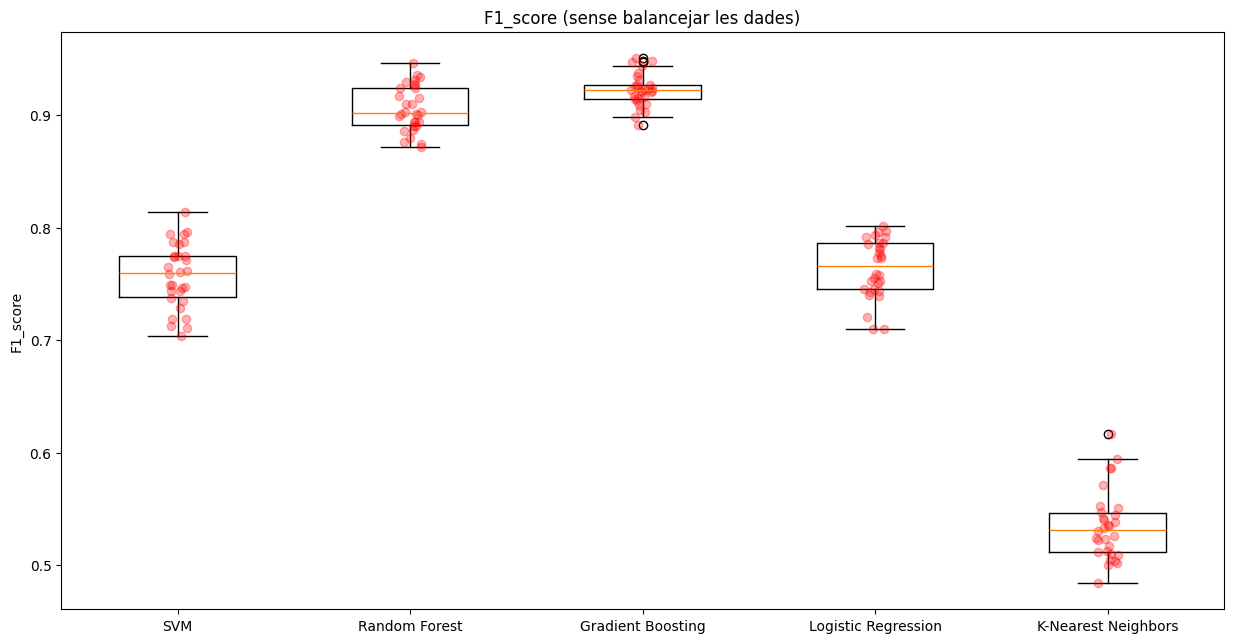

In [12]:
#The splitting can be done using the tools provided by sklearn:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#models amb hiperparametres per defecte
models = {
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier())
}


testsize = 0.2
n_proves = 30
f1_r=np.zeros((n_proves,len(models)))
model_names = list(models.keys())

for i in range(n_proves):
    for j, name in enumerate(model_names):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

        model = models[name]
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)

        f1_r[i][j] = metrics.f1_score(y_test, y_pred)


plt.figure(figsize=(15,7.5))
plt.boxplot(f1_r)
for i in range(len(models)):
    xderiv = (i+1)*np.ones(f1_r[:,i].shape)+(np.random.rand(n_proves,)-0.5)*0.1
    plt.plot(xderiv,f1_r[:,i],'ro',alpha=0.3)

#ax = plt.gca()
#ax.set_xticklabels(model_names)
plt.xticks(range(1, len(model_names) + 1), model_names)
plt.ylabel('F1_score')
plt.title('F1_score (sense balancejar les dades)')


mean_f1 = f1_r.mean(axis=0)
std_f1 = f1_r.std(axis=0)

for name, mean, std in zip(model_names, mean_f1, std_f1):
    print(f"{name:<20} F1: {mean:.3f} ± {std:.3f}")


In [13]:
models = {
    "Logistic Regression": Pipeline([
        ("scale", StandardScaler()),
        ("clf", LogisticRegression())
    ]),
    
    "KNN": Pipeline([
        ("scale", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    
    "SVM": Pipeline([
        ("scale", StandardScaler()),
        ("clf", SVC())
    ]),
    
    "Random Forest": Pipeline([
        ("clf", RandomForestClassifier())
    ]),
    
    "GradientBoosting": Pipeline([
        ("clf", GradientBoostingClassifier())
    ])
}


In [14]:
param_grids = { #canviar/afegir hiperparàmetres??
   "Logistic Regression": {
        "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__max_iter": [300, 500, 1000]
    },
    "KNN": {
        "clf__n_neighbors": [1, 3, 5, 7, 9, 15, 25],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]   # Manhattan / Euclidean
    },

    "SVM": {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ["scale", "auto"]   # només s’usa amb RBF
    },

    "Random Forest": {
        "clf__n_estimators": [100, 200, 400, 700],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__max_features": ["sqrt", "log2"]
    },
    
    "GradientBoosting": {
        "clf__n_estimators": [100, 300, 500],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [2, 3, 5],
        "clf__subsample": [0.6, 0.8, 1.0]
    }

}


In [15]:
f1_scorer = make_scorer(f1_score)

In [16]:
"""
best_results = []

for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    
    best_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train F1": f1_score(y_train, grid.predict(X_train)),
        "Test F1": f1_score(y_test, grid.predict(X_test)),
        "Time (s)": round(end - start, 2)
    })
"""

'\nbest_results = []\n\nfor name, model in models.items():\n    grid = GridSearchCV(model, param_grids[name], cv=5, scoring=\'f1\')\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)\n\n    start = time.time()\n    grid.fit(X_train, y_train)\n    end = time.time()\n\n    best_results.append({\n        "Model": name,\n        "Best Params": grid.best_params_,\n        "Train F1": f1_score(y_train, grid.predict(X_train)),\n        "Test F1": f1_score(y_test, grid.predict(X_test)),\n        "Time (s)": round(end - start, 2)\n    })\n'

In [17]:
"""
print("Resultats del Grid Search: \n")
results_df = pd.DataFrame(best_results)
print(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))
"""

'\nprint("Resultats del Grid Search: \n")\nresults_df = pd.DataFrame(best_results)\nprint(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))\n'

In [18]:
best_results = []

for name, model in models.items():
    grid = RandomizedSearchCV(model, param_grids[name], cv=5, scoring='f1')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    
    best_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train F1": f1_score(y_train, grid.predict(X_train)),
        "Test F1": f1_score(y_test, grid.predict(X_test)),
        "Time (s)": round(end - start, 2)
    })


In [19]:
print("Resultats del Grid Search: \n")
results_df = pd.DataFrame(best_results)
print(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))

Resultats del Grid Search: 

              Model                                                                                                                              Best Params  Train F1  Test F1  Time (s)
   GradientBoosting                                        {'clf__subsample': 0.6, 'clf__n_estimators': 100, 'clf__max_depth': 5, 'clf__learning_rate': 0.1}  0.999176 0.904762    130.08
      Random Forest {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None}  0.975692 0.872340     54.03
                SVM                                                                          {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 100}  0.789338 0.726027     43.51
Logistic Regression                                                                       {'clf__solver': 'liblinear', 'clf__max_iter': 1000, 'clf__C': 0.1}  0.783133 0.723549      0.52
                KNN                      

Una primera selecció de Hiperparametres (Randomized Search)

| Model                | Millors hiperparàmetres                                                                                                 | F1-score       |
|----------------------|---------------------------------------------------------------------------------------------------------------------------|-----------|
| GradientBoosting     | {'clf__subsample': 1.0, 'clf__n_estimators': 100, 'clf__max_depth': 2, 'clf__learning_rate': 0.05}                       | 0.918367  |
| Random Forest        | {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None} | 0.868327  |
| SVM                  | {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 10}                                                           | 0.726027  |
| Logistic Regression  | {'clf__solver': 'lbfgs', 'clf__max_iter': 300, 'clf__C': 0.1}                                                             | 0.724138  |
| KNN                  | {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 15}                                                         | 0.500000  |


Entrenem els models amb els hiperparametres trobats per Randomized Search Cross Validation

In [20]:
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), 
                                    LogisticRegression(solver='lbfgs', max_iter=300, C=0.1)),
    "KNN": make_pipeline(StandardScaler(), 
                    KNeighborsClassifier(weights='distance', p=1, n_neighbors=15)),
    "SVM": make_pipeline(StandardScaler(),
                    SVC(probability=True, kernel='linear', gamma='scale', C=10)),
    "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',max_depth=None),
    "GradientBoosting": GradientBoostingClassifier(subsample=1.0, n_estimators=100, max_depth=2, learning_rate=0.05)
}


Cross Validation Boxplot

Logistic Regression  F1: 0.769 ± 0.025
KNN                  F1: 0.555 ± 0.041
SVM                  F1: 0.765 ± 0.024
Random Forest        F1: 0.904 ± 0.018
GradientBoosting     F1: 0.924 ± 0.020


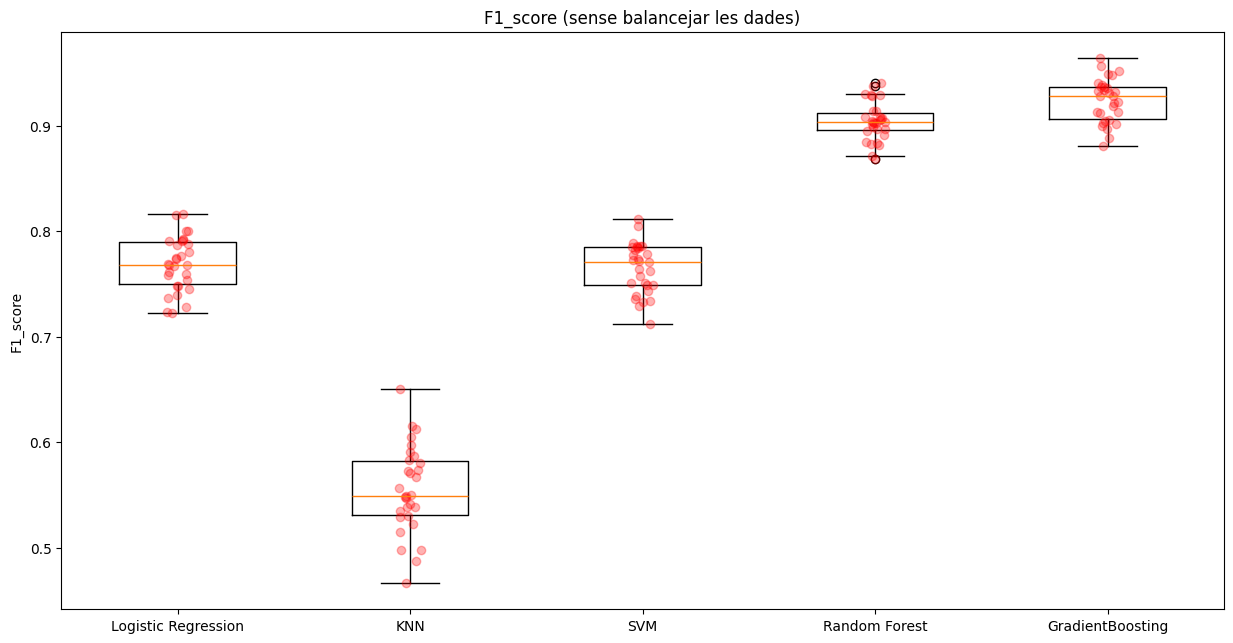

In [21]:
#The splitting can be done using the tools provided by sklearn:
from sklearn.model_selection import train_test_split
from sklearn import metrics


models = {
    "Logistic Regression": make_pipeline(StandardScaler(), 
                                    LogisticRegression(solver='lbfgs', max_iter=300, C=0.1)),
    "KNN": make_pipeline(StandardScaler(), 
                    KNeighborsClassifier(weights='distance', p=1, n_neighbors=15)),
    "SVM": make_pipeline(StandardScaler(),
                    SVC(probability=True, kernel='linear', gamma='scale', C=10)),
    "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',max_depth=None),
    "GradientBoosting": GradientBoostingClassifier(subsample=1.0, n_estimators=100, max_depth=2, learning_rate=0.05)
}


testsize = 0.2
n_proves = 30
f1_r=np.zeros((n_proves,len(models)))
model_names = list(models.keys())

for i in range(n_proves):
    for j, name in enumerate(model_names):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

        model = models[name]
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)

        f1_r[i][j] = metrics.f1_score(y_test, y_pred)


plt.figure(figsize=(15,7.5))
plt.boxplot(f1_r)
for i in range(len(models)):
    xderiv = (i+1)*np.ones(f1_r[:,i].shape)+(np.random.rand(n_proves,)-0.5)*0.1
    plt.plot(xderiv,f1_r[:,i],'ro',alpha=0.3)

#ax = plt.gca()
#ax.set_xticklabels(model_names)
plt.xticks(range(1, len(model_names) + 1), model_names)
plt.ylabel('F1_score')
plt.title('F1_score (sense balancejar les dades)')


mean_f1 = f1_r.mean(axis=0)
std_f1 = f1_r.std(axis=0)

for name, mean, std in zip(model_names, mean_f1, std_f1):
    print(f"{name:<20} F1: {mean:.3f} ± {std:.3f}")


ROC-CURVE

In [22]:
var = [c for c in alzheimer.columns if c not in ["Diagnosis", "PatientID"]]

target_variable = "Diagnosis"

X = alzheimer[var]
y = alzheimer[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

ROC Curve (AUC-ROC):
	Logistic Regression: 0.8889
	KNN: 0.8135
	SVM: 0.8876
	Random Forest: 0.9490
	GradientBoosting: 0.9432


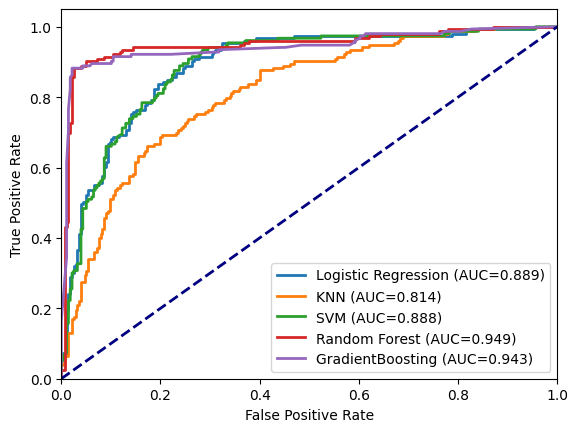

In [23]:
plt.figure()
lw = 2

print(f"ROC Curve (AUC-ROC):")
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]  

    auc_roc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, ths = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_roc:.3f})", lw=lw)
    print(f"\t{name}: {auc_roc:.4f}")


plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

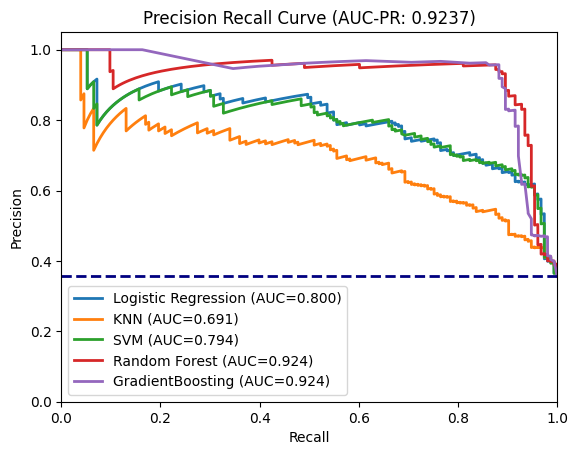

In [24]:
plt.figure()
lw = 2

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]  

    auc_pr = average_precision_score(y_test, y_pred_proba)
    prec, recall, ths = precision_recall_curve(y_test, y_pred_proba)

    plt.plot(recall, prec, label=f"{name} (AUC={auc_pr:.3f})", lw=lw)


prop = np.mean(y_test)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision Recall Curve (AUC-PR: {auc_pr:.4f})")
plt.legend()
plt.show()